# Success Indicators of Crowdfunding Projects - milestone report
### (final paper draft)

### _Lukas Vlcek_

---


## 1. Introduction

Online crowdfunding platforms have become popular places for individuals and small teams to raise money for their projects by aggregating funds from many small investors. One of the earliest and most dominant platforms is Kickstarter, which as attracted more than 200,000 project proposals, out of which more than 100,000 have been successfully funded. It offers 15 main categories with a large number of subcategories, which are mainly focused on arts and manufacturing novel gadgets. The projects are only funded if the full amount is raised (all or nothing system), and the recent overall success rate is around 36%. The main goal of the project proposers is therefore to gather enough funding sufficient for completing their project by choosing the right category, funding target, and appropriate project description and promotion.

To decide whether it is worth starting a funding campaign or investing money in manufacturing of a new product, it is important to evaluate the expected success or failure of the project and to optimize the chances of success by choosing appropriate project category, funding target, and description. The goal of this data science project is to provide a tool for a client to make informed decisions about how (and whether) to proceed with their funding campaign.

This will accomplished by analysing historical data from the Kickstarter database of past and current projects to find indicators of success. With a predictive model, a client could weight the cost of their initial investments, and adjust the variables under their control to optimize the proposal to increase the chances of funding through adjustments to target amounts, the use of certain keywords, or the effect of more thorough and professional presentation. In addition, a predictive model of proposal success may serve as a filter for investors making decisions about funding. Also, individuals looking for new ideas could use the results to identify promising areas and avoid those with lower chance of success.

In the following I will analyze trends and correlations in the data to identify predictive features and construct a predictive model of succesful funding. Understandably, the model cannot be exptected to be completely accurate, because evaluation of the intrinsic value of a unique novel product often requires a substantial domain knowledge, which may be impossible to glean only from quantitative characteristics of the past records. However understanding the general drivers of proposal success may put the expectation of potential startups in perspective and avoid unnecessary costs.

## 2. Dataset

### 2.1 Source and format
The primary source of data for the Kickstarter platform has been obtained from online, monthly updated repositories collected by a web scraping company [Web Robots](https://webrobots.io/).

* [Kickstarter data (4/2014 - present): https://webrobots.io/kickstarter-datasets/](https://webrobots.io/kickstarter-datasets/). 

The data sets are available in JSON and CSV formats. For the present analysis, I chose CSV files, which are grouped into montly archives, with each archive containing around 30 individual files.


### 2.2 Contents of raw data

The total number of records in the combined CSV files was nearly 4 million, however most of these records were duplicates of the same projects recorded each month. Inspection of the individual CSV files indicated that monthly records starting from March 2016 to present adhere to the same features. These were selected for further analysis, while the older were discarded. Given the vast majority of the data adhered to the newer format and with reported >200K unique projects/samples the retained records should contain enough data for statistical analysis and modeling. This selection also eliminated missing values in the dataset.
Each of the selected records is characterized by 32 features, including dates, deadlines, project descriptions, funding goals, and invested funds.

### 2.3 Limitations

There are potentially additional sources of valuable data available on the internet, in the form of favorable articles, independent reviews, or responses under related video presentation (e.g., YouTube). Including this information would be valuable for increasing the accuracy of the predictive model, however, this would be beyond the scope of the currently proposed work.

## 3. Data wrangling


** Inspection of the contents and selection of relevant features **

Inspection of the columns indicate that many entries are in the form of JSON strings, with useful information embedded inside the directory structure. Some columns do not seem to contain information useful for this project (e.g. photo).
Dates seem to be stored in the form of a datastamp. Only informative relevant columns were selected, reducing their overall number from 32 to 18.

** Concatenating data frames from multiple CSV files and elimination of duplicate entries **

All 961 CSV files were read from the raw data directory tree and stored in a new concatenated dataframe.
The resulting dataset shows significant duplication of records as the same projects are recorded month after month. In fact around 90% of the entries are duplicates. While I have dropped identical records, there are still duplicate projects with the same id. As I am interested in comparing different projects and their final status, I eliminated all the ID duplicates and only keep the last one. Roughly 260K unique project records remained in the dataset, which corresponds to the number reported by Kicstarter.

** Filtering and cleaning data into a useful format **

As inspection of the entries showed, several were in the JSON string format. I have extracted the imporant 'category' feature from the appropriate JSON string in the 'category' column using 'map' method and JSON module. The resulting dataframe was saved in the interim data directory. Since the 'category' feature is rather fine grained with 169 different labels, I have processed this column to extract the more general category type descriptor which was contained as the first part of the category string (before '/'). The new cat_type colomn with 15 unique labels was added for exploratory analysis. The check for erroneous outliers did not reveal any suspicious items, only very skewed distributions. The resulting dataframe was saved in data/processed directory. The original 43 GB of raw data was reduced to a ~90 MB CSV file.


## 4. Statistical analysis 

## 4.1 Predictor and target variables

The primary target variables useful for both groups (investors and proposers), are (i) the binary catergorical variable **state** representing the success or failure of the funding campaign, and (ii) the (roughly) continuum numerical variable **pledged** representing the amount of money ultimately pledged by the investors. The predictor variables, whose significance and correlations will be tested, include (i) the **goal** amounts,
(ii) project **category type**, and (iii) **country** of project origin. A special variable is **staff pick**, which can be useful for investors, but is not available as a predictor for proposers; therefore, we can treated as both target variable for propers and predictor variable for investors.

## 4.2 Data variation over time

It can be observed that the success rate, calculated as a fraction of successful projects in a month, changes over time, possibly with changes in rules.

![](../reports/trends.png)

Splitting the data on 2014-07-01 and assigning them to two corresponding groups 'old' and 'new' shows two approximately normal distributions (checked with a Q-Q plot)
of montly success rates, with old success rate of 0.63 changing to 0.40 in the new period. A two-sample t-test was used to reject decisevely (p-value ~0) the null hypothesis
that this change of montly success rates is only a random fluctuation. 
The success rate trend closely corresponds to the overall monthly number of new projects, which significantly increased in mid 2014, but has been drifting down since then.

With respect to predictive modeling, we may also ask how the rules change influences the model parameters and its predictions. We should be able to train the model on both
the old data and new data, and investigate how transferable different model paramters are and whether the relations between the variables will still hold.
For instance, can the decrease in the success rate be explained simply as higher availability to lower quality projects, or did the new rules influence the model itself.

The data for the latest month are incomplete, and therefore exhibit a drop.

## 4.3 Significance of individual predictor variables for estimating the success rates

** Category type and country **

Using scipy.stats.chi2\_contingency function on the results of pivot table with project success as index and category type in columns, we can test if there are statistically significant differences in success between all 15 different categories. The result with large $\chi^2$ = 18747 and p-value ~0 confirms what was obvious from the visual exploratory analysis, i.e. there are in fact big differences between success in different categories.

The same analysis for all 22 countries and also yielded a very significant effect with $\chi^2$ = 2934 and negligible p-value ~0.

** Staff picks **

Staff picked project may highlight a potentially successful project to prospective investors.
Even though the picks are not simply guesses of the staff about the success of
individual projects, but may reflect their subjective opinions about the value of the project goals, we will treat treat the picks as predictions.
In this case we may calculate the confusion matrix to evaluate the usual prediction characteristics and their significance.

|          | Succeeded | Failed |
|----------|:---------:|:------:|
| Picked   | 23508     |  3764  |
|Not picked| 88306     | 107857 |

The calculated prediction characteristics (Accuracy = 0.59, Precision = 0.86, Recall = 0.21, Specificity = 0.97) show that the staff
is highly successful at eliminating unsuccessful projects (specificity) and most of their picks are successful (precision) despite the odds of randomly picking a succesful project.
Since only about 10\% of projects are picked and around 40\% is the success rate, it cannot be expected that the recall rate will be high.

We have also noticed that staff pick rates have been drifting down over the past 8 years from roughly 17.5\% to about 7.5\%.

** The effect of goal amount **

The effect of the goal amount on the success of the funding campaign can be evaluated using logistic regression and analyzing the significance of the regression parameters (Figure 2). Here we used the statsmodels generalized regression functionality for binomial family. The summary statistics shows near zero p-values for both parameters - intercept -2.3 and slope 0.67, with the funding probability as shown in the following figure.

![](../reports/success_goal.png)

## 4.4 Correlations between predictor variables: category type vs. country

We noted in the exploratory data analysis, that there appears to be preference of different sets of categories based on the country of project origin. Here we analyze if there are significant differences between countries when it comes to success within each category. Calculating $\chi^2$ statistic (large) and corresponding p-values (near zero) for success within each category based on the country of origin, leads to the conclusion that **country** variable has
significant effect on success asside from the category itself. Cultural diffrences may explain this. For instance, while *dance* category type is overall successful, especially for less developed countries, such as Mexico,
none of the 4 projects originating from Switzerland succeeded, even though other projects from this country are succesful. This may also suggest that artistic projects of this type are predominantly funded by investors from the same country, assuming that investors from more conservative and developed countriescountries are less interested in this type of projects. The question how important it is to add the country of origin information to the other variables will be answered more comprehensively by testing the predictive model.

Inspired by these results, we can also look at similarity between countries based on the types of projects. We compare similarity and distances between countries based on the probability distributions over the category types proposers choose. We can represent each distribution as a point in the probability space and measure distances between countries. Using dimensionality reduction based on PCA, we can also visualize the similarty between different countries, as shown in the following figure.

![](../reports/country_similarity.png)

It is seen that countries with similar cultures and geographies can be found nearby. Thus, Mexico is on the opposite side of the plot as Hong Kong and Singapore, US and Great Britain are very close, Scandinavian countries are nearby, and so are other European countries. Interestingly, Japan is most dissimilar from other countries.

Other correlations, such as goal and category can be analyzed, but we leave it for the eventual analysis of the predictive model.


## 5. Predictive modeling

Since the available data contain information about the target variables, i.e., amounts raised and the success of funding campaigns, I will employ supervised learning algorithms to train the predictive models, using the scikit-learn library .

A simple way to explain a binary variable depending on numerical and categorical variables, such as the goal amount, and catogory, is to use logistic regression with dummy variables. This method will be tried first, and combined with a simple text analysis based on Naive Bayes method.

A more complex approach based on Bayesian inference will also be tested. It can be expected that explicit inclusion of correlations between predictor variables (as opposed to implicit through the regularization term in the logistic regression) will result in more accurate predictions. Also, by reconstructing the full joint distribution of data and model parameters will allow us to use the same model to generate artificial data, and provide predictions both for proposers and investors.

## 2. Data setup

Notebook configuration

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Create a dataframe from a pre-processed CSV file and filter out uninformative features

In [2]:
target_path = '../data/processed'
filename = 'kick_id.csv'
datecols = ['created_at', 'deadline', 'state_changed_at', 'launched_at']
fdatpars = lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')
df = pd.read_csv(os.path.join(target_path, filename), index_col='id', parse_dates=datecols, date_parser=fdatpars)
df = df.drop(['disable_communication'], axis='columns')

Filter out ongoing (live) and suspended projects. The live projects can be used to test predictions as the funding period concludes

In [3]:
df = df.loc[(df['state'] != 'live') & (df['state'] != 'suspended')]

Merge 162 categories to 15 more general category types for easier analysis and better statistics

In [4]:
cat_type = [x.split('/')[0] for x in df['category'].values]
df['cat_type'] = np.array(cat_type)

**Basic dataset information**

In [5]:
df.head(3)

,name,goal,pledged,usd_pledged,state,slug,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,blurb,spotlight,category,cat_type
id,,,,,,,,,,,,,,,,,,
18520,Grandma's are Life,15000.0,62.0,62.000000,failed,grandmas-are-life,US,USD,2016-11-18 09:32:40,2016-11-18 09:32:40,2016-10-19 08:13:18,2016-10-19 09:32:40,False,4,Raising money to help my grandmother recover f...,False,music/world music,music
21109,Meta,150.0,173.0,258.036032,successful,meta,GB,GBP,2015-05-06 17:00:00,2015-05-06 17:00:12,2015-04-07 10:07:05,2015-04-07 18:37:44,False,11,My work is performance based but I branch out ...,True,art/performance art,art
24380,Puss N' Books: A relaxing cat cafe and bookstore.,20000.0,776.0,776.000000,failed,puss-n-books-a-relaxing-cat-cafe-and-bookstore,US,USD,2015-11-26 11:25:33,2015-11-26 11:25:33,2015-10-25 11:32:25,2015-10-27 11:25:33,False,18,A sanctuary for humans and felines alike! Come...,False,food/spaces,food


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238456 entries, 18520 to 2147476221
Data columns (total 18 columns):
name                238455 non-null object
goal                238456 non-null float64
pledged             238456 non-null float64
usd_pledged         238456 non-null float64
state               238456 non-null object
slug                238456 non-null object
country             238456 non-null object
currency            238456 non-null object
deadline            238456 non-null datetime64[ns]
state_changed_at    238456 non-null datetime64[ns]
created_at          238456 non-null datetime64[ns]
launched_at         238456 non-null datetime64[ns]
staff_pick          238456 non-null bool
backers_count       238456 non-null int64
blurb               238441 non-null object
spotlight           238456 non-null bool
category            238456 non-null object
cat_type            238456 non-null object
dtypes: bool(2), datetime64[ns](4), float64(3), int64(1), object(8)
memory us

**Comment:** Out of the 18 columns in the processed dataset with no missing values, we can identify two main target properties.
1. Column 'state' provides the classification of each project as 'successful' or 'failed' based on whether the funding goal was reached.
2. Since the success or failure of a campaign is directly determined by 'pledges' by funders reaching or exceeding the 'goals' set by the proposers, we can also consider the actual amounts of pledged funds as another target. Such a task would go beyond simple classification and could provide highly valuable estimate for the proposers, and possibly suggest strategies not only to reach goals, but also maximize the amount of funding.

The remaining features can be potentially used for the prediction of the success or failure. We will explore the relations of these features to the targets and their potential value as predictors.

## 2. Basic statistics for different features

First we will explore the basic characteristics of different property distributions and correlations within the data.

### 2.1 Overall success/failure rates

**Q:** What is the average success rate of the submitted proposals?

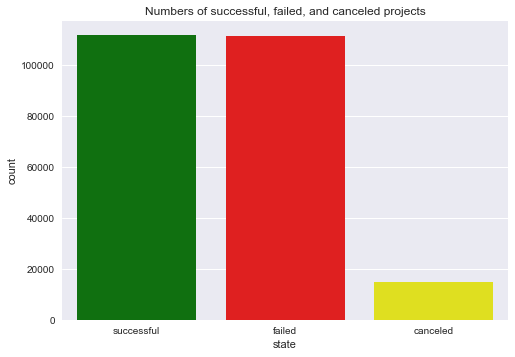

In [7]:
sns.set_context("notebook")
order = ['successful','failed','canceled']
colors = ['green','red','yellow']
sns.countplot(x='state', data=df, order=order, palette=dict(zip(order,colors)))
plt.title("Numbers of successful, failed, and canceled projects")

**Q:** Does the success rate change over time?

Mininimum success rate:
 launched_at
2014-07-31    0.268002
Freq: M, dtype: float64


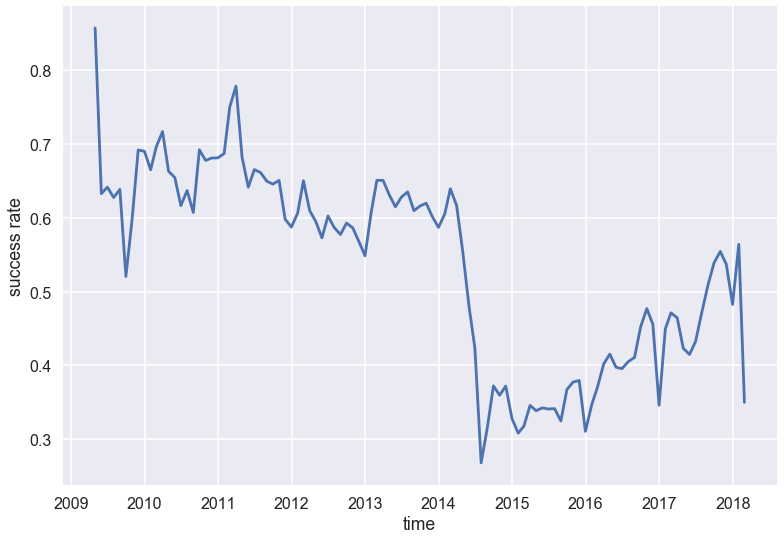

In [37]:
# create time series of success rates averaged over months
sr_rate_time = pd.Series(np.int_(df['state'] == 'successful'), index=df['launched_at']).resample('M').mean()

# plot success rate 
plt.plot(sr_rate_time.index, sr_rate_time)
plt.xlabel('time')
plt.ylabel('success rate')
print('Mininimum success rate:\n', sr_rate_time[sr_rate_time == sr_rate_time.min()])

**A:** The time series show that there was a large drop in success rates in July of 2014. This may have been caused by changes in the funding rules. Since then the rate has been rising, with the exception of the last month. This drop may be further analyzed to see if individual categories have been affected more than others, and more weight can be assigned to more recent data when training a predictive model.

**Observation:** Out of the completed funding campains, about half were successful, i.e., the pledged amounts reached or exceeded the goal amounts. We can consider this 50% success rate as the first rough baseline for measuring the quality of our future predictive models. In principle, cancelled projects could be also classified as 'not successful' and we may investigate whether there are some predictors of canceled projects.

### 2.2 Overall funding goals vs. pledges

One of the main features of interest in the dataset are the pledges and goals, whose ratio ultimately determines the success of the funding campaign.

The first orientation about the scope of the amounts found on Kickstarter can be provided by basic statistical descriptors.

In [9]:
df[['goal', 'usd_pledged']].describe()

,goal,usd_pledged
count,2.384560e+05,2.384560e+05
mean,4.520084e+04,1.122812e+04
std,1.114512e+06,1.067187e+05
min,1.000000e-02,0.000000e+00
25%,2.000000e+03,5.000000e+01
50%,5.000000e+03,1.020160e+03
75%,1.500000e+04,5.325000e+03
max,1.000000e+08,2.033899e+07


We see that the amounts range from zero to tens of millions of dollars. The summary statistics can be therefore skewed by the the infrequent but very large maximum values.

To better analyze the wide ranges of values, we can use the statistics on the logarithmic scale.

In [10]:
# take logarithms of the goal and pledged amounts. Eliminate zeros before taking logarithms
goal_log = np.log10(df.loc[df['goal'] > 0.0]['goal'])
pledged_log = np.log10(df.loc[df['pledged'] > 0.0]['pledged'])
goal_log_mu = 10**np.mean(goal_log)
pledged_log_mu = 10**np.mean(pledged_log)
print("Log-average of the goals:", goal_log_mu, 'dollars')
print("Log-average of the pledges:", pledged_log_mu, 'dollars')

Log-average of the goals: 5106.657783416269 dollars
Log-average of the pledges: 1013.4713415266599 dollars


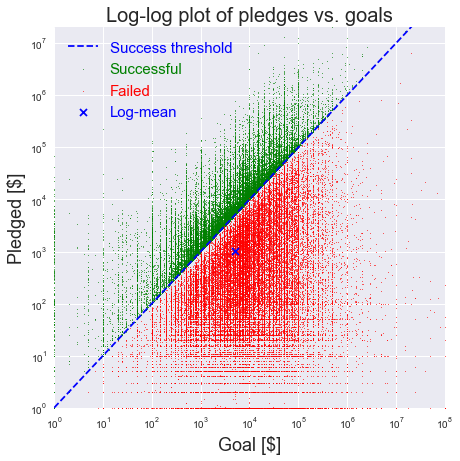

In [11]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("goal", "pledged", df.loc[df.state == 'successful'], scatter_kws={"s": 1}, fit_reg=False, color='green',label='Successful')
sns.regplot("goal", "pledged", df.loc[df.state == 'failed'], scatter_kws={"s": 1}, fit_reg=False, color='red',label='Failed')
#sns.regplot("goal", "pledged", df.loc[df.state == 'canceled'], scatter_kws={"s": 1}, fit_reg=False, color='black',label='Canceled')
plt.plot([1,1e8],[1,1e8],linestyle='--', color='blue', label='Success threshold')
plt.scatter([goal_log_mu], [pledged_log_mu], marker='x', c='b', label='Log-mean')
plt.xlim(1,df.goal.max())
plt.ylim(1,df.usd_pledged.max())
plt.xlabel('Goal [$]', fontsize=18)
plt.ylabel('Pledged [$]', fontsize=18)
leg = plt.legend(fontsize=15)
leg.get_texts()[0].set_color('blue')
leg.get_texts()[1].set_color('green')
leg.get_texts()[2].set_color('red')
leg.get_texts()[3].set_color('blue')


plt.title('Log-log plot of pledges vs. goals', fontsize=20)

**Observations:** We can see that the goals and pledged amounts follow roughly a lognormal distribution, with means of around \$5000 for goals, and \$1000 for pledges.

Concerning the predictive value of this data, we can look at the dependence of pledged amount on goals and how the goal may influence the likelihood of success and the pledged amount.

Log-log plot of pledges vs. goals for different categories


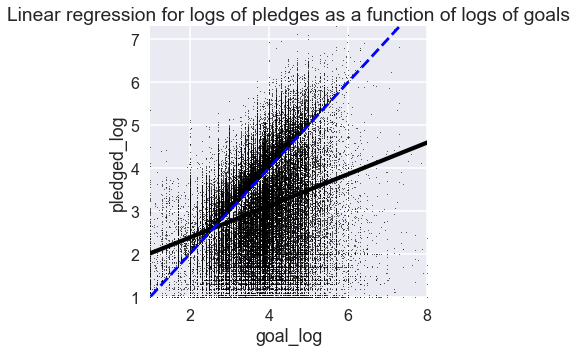

In [12]:
df_log = df.loc[df['pledged'] > 0.0].copy()
df_log['goal_log'] = np.log10(df_log['goal'].values)
df_log['pledged_log'] = np.log10(df_log['pledged'].values)

sns.set_context("poster")
print('Log-log plot of pledges vs. goals for different categories')
lmp = sns.lmplot(x="goal_log", y="pledged_log", data=df_log, scatter_kws={"s": 1, "color":'black'}, line_kws={"color":'black'})
#lmp.set(xscale="log", yscale="log")
plt.plot([1,1e8],[1,1e8],linestyle='--', color='blue', label='Success threshold')
plt.xlim(1,df_log.goal_log.max())
plt.ylim(1,df_log.pledged_log.max())
plt.title('Linear regression for logs of pledges as a function of logs of goals')

**Observation:** While ghe pledged amounts rise with rising goals, the black regression line has a lower slope than the threshold line. On average, the success rate will fall with the goals. Obviously, the linear regression may not be the most appropriate predictor of the pledged amount, as the datapoints are not distributed along a line and the prediction errors are large.

Logistic regression may provide a better prediction of success as a function of goal amounts.


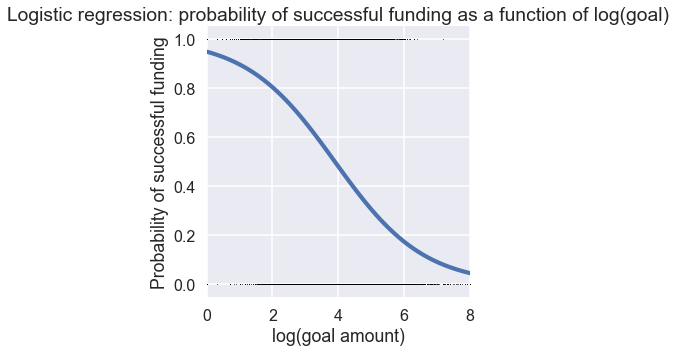

In [13]:
df_log['succeeded'] = df_log['state'] == 'successful'
lmp = sns.lmplot(x="goal_log", y="succeeded", data=df_log, logistic=True, ci=None, scatter_kws={"s":1,"color":'black'})
plt.xlim(0,df_log.goal_log.max())
plt.xlabel('log(goal amount)')
plt.ylabel('Probability of successful funding')
plt.title('Logistic regression: probability of successful funding as a function of log(goal)')

**Observation:** The logistic regression line indicates that lower goals result in higher success, and that the break-even point of probability=0.5 is at about \$10,000.


Another interesting feature of the pledged-goal distribution is the depletion region right below the threshold for successful funding (dashed blue line), followed by sharp increase of pledged amounts just at the threshold.
This feature in the data can be made more obvious on a plot of completed project numbers as a function of pledged/goal ratio.

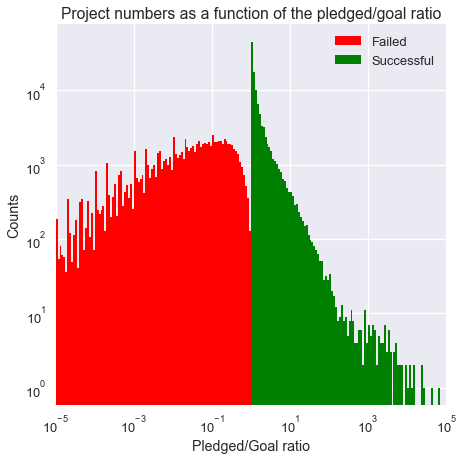

In [14]:
sns.set_context("talk")
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale='log')
logbins=np.logspace(-5, 5, num=201, endpoint=True)
ratio = df['pledged']/df['goal']
success = ratio > 1.0
#plt.hist(ratio, bins=logbins, label='Failed', normed=False)
plt.hist(ratio[np.logical_not(success)], bins=logbins, color='red', label='Failed')
plt.hist(ratio[success], bins=logbins, color='green', label='Successful')
#plt.vlines(1.0, 1e-10, 1e4)
plt.legend()
plt.xlabel('Pledged/Goal ratio')
plt.ylabel('Counts')
plt.xlim(1e-5,1e5)
plt.title("Project numbers as a function of the pledged/goal ratio")

Here we can clearly see that once the funding approaches the success threshold, the probability of reaching and exceeding it rises. This information should be reproduced by a model predicting the pledged amounts. An interesting question may be about the origin of this behavior. Possible answers may include bigger interest from funders simply because the project seems on a good track. The proposers may also increase advertising activity to reach the goal. However to indentify the likely origin of this trend, additional data would have to be collected.


**Note:** It may be also worth analyzing why exactly the distribution of goals and pledges is approximately log-normal. These distributions typically result from the products of independent random variables, while normal distributions result from their sums. This insight may also help us in the construction of a model for predicting pledged amounts.

** Look at extreme goals **

**Q:** The maximum goals can reach up to very large amounts \$100M. Can these proposals be legitimate? Is setting such high goals a good strategy? Unless the amount is necessary for a functional project, this does not seem a good choice because it is unlikely to be fully funded.

In [15]:
df_max = df.loc[df['goal'] == 1e8][['name','category','usd_pledged','backers_count','country','blurb']].sort_values(by='category').reset_index()
print("Number of projects asking maximum amount ($100M):", df_max.shape[0])
df_max.tail()

Number of projects asking maximum amount ($100M): 19


,id,name,category,usd_pledged,backers_count,country,blurb
14,1119122774,"Help me start a fair media company, Trump Media",journalism/video,1.000000,1,US,"You might be asking why I decided to call it ""..."
15,487345242,Billionaire Boy Blog (Canceled),publishing/young adult,0.000000,0,DK,An exclusive blog about a 18 year old milliona...
16,953415668,Currency Free System,technology/software,0.502121,1,MX,CF is an independent currency system and a tra...
17,1601563193,Our future,technology/space exploration,0.928942,1,AU,The new century has begun may our life's get e...
18,2083255961,A Billion Pixels...,technology/web,56.000000,6,US,"A billion pixel website, a billion pixel displ..."


Examples of project descriptions

In [16]:
# Trump media company
print(df_max.loc[14][6])

You might be asking why I decided to call it "Trump Media," well its simple. Our media will "trump" the lame stream media


In [17]:
# Billionaire boy
print(df_max.loc[15][6])

An exclusive blog about a 18 year old millionaire.
The blod will consist of fashion, cars, sport, travelling and much more.


In [18]:
# New currency
print(df_max.loc[16][6])

CF is an independent currency system and a trading tool that runs parallel to all existing currency systems.


In [19]:
df_max.set_index('id').mean()

usd_pledged      7.744468
backers_count    1.000000
dtype: float64

** A:** Most of the 18 extreme goals of \$100M seem suspicious and unrealistic, with the proposers not fully understanding how the Kickstarter funding works (all or nothing). Based on the averaged amounts pledged (\$7.75) and the number of funders (1), these extreme goals do not attract funding.

## 3. Success of funding based on project categories

A lot of the variation in the financial goals may depend on the category of the projects, with smaller art projects involving a few people not needing much funding, and technology mass manufacturing type of projects needing large amounts.

For instance, the proposers may be able to optimize the amounts asked, or, if they have multiple ideas, choose a category with the highest likelihood of funding.

** Questions **

1. Are the success rates and funding strongly dependent on the category?
2. What are the most promising categories in terms of likelihood of funding and the overal amounts obtained?

In [20]:
# number of different categories
print("Number of categories:", df['category'].value_counts().shape[0])
print("Most frequent category:", df['category'].value_counts().head(1))
print("Least frequent category:", df['category'].value_counts().tail(1))

Number of categories: 169
Most frequent category: games/video games    7340
Name: category, dtype: int64
Least frequent category: crafts/taxidermy    11
Name: category, dtype: int64


** Observation **
* There are too many (169) categories for easy evaluation, going from the most frequent 'games/video games' (7340) to the least frequent 'crafts/taxidermy' (11)
* It is easier to analyze the trends in terms for general category types, that can be extracted from the category names.
* This coarse-graining will also improve the statistics for model development.

** Category types statistics **

In [21]:
print("Number of categories:\n", df['cat_type'].value_counts())

Number of categories:
 film & video    36225
music           34954
publishing      29462
technology      24341
games           20360
art             20214
food            15059
fashion         14150
design          10277
comics           7745
photography      6717
theater          6190
crafts           5495
journalism       4225
dance            3042
Name: cat_type, dtype: int64


The most frequent category type is 'film & video', while the least frequent is 'dance'.

** Q: What are the success rates for different categories? **

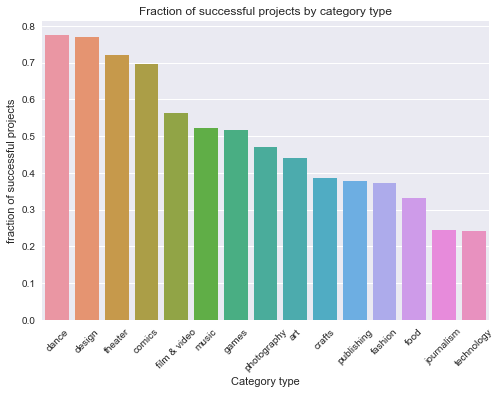

In [22]:
sns.set_context("notebook")
pt = df.pivot_table(index='cat_type', columns='state', values='country', aggfunc='count')
x = (pt['successful']/(pt.sum(axis='columns'))).to_frame(name='ratio').sort_values(by='ratio', ascending=False)
sns.barplot(x=x.index, y='ratio', data=x)
plt.xticks(rotation=45)
plt.xlabel('Category type')
plt.ylabel('fraction of successful projects')
plt.title('Fraction of successful projects by category type')

**A:** Dance and design have the highest success rate, while technology and journalism the least

**Q:** What are the median amounts targeted and pledged?

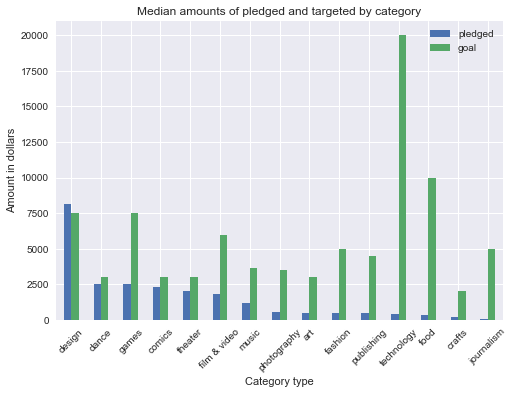

In [23]:
gp = df.groupby('cat_type').median()[['goal','pledged']].sort_values(by='pledged', ascending=False)
gp.plot(y=['pledged','goal'], kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Category type')
plt.ylabel('Amount in dollars')
plt.title('Median amounts of pledged and targeted by category')

**Q:** What are the total amounts invested in different categories?

              pledged
cat_type             
dance     13112260.43


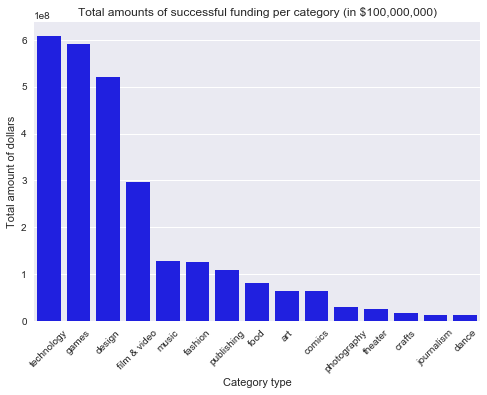

In [24]:
pl = df.loc[df.state == 'successful'].groupby('cat_type').sum()[['pledged']].sort_values(by='pledged', ascending=False)
sns.barplot(x=pl.index, y='pledged', data=pl, color='blue')
plt.xlabel('Category type')
plt.ylabel('Total amount of dollars')
plt.title("Total amounts of successful funding per category (in $100,000,000)")
plt.xticks(rotation=45)
print(pl.tail(1))

**A:** While the investments into technolgy were ~ \$600M, even the smallest dance category still attracted \$13M.

Given the low median for technology, the successful technology projects attract large amounts

A more detailed look at the goals and funding per category may reveal some interesting features.

Log-log plot of pledges vs. goals for different categories


(1, 20338986.27)

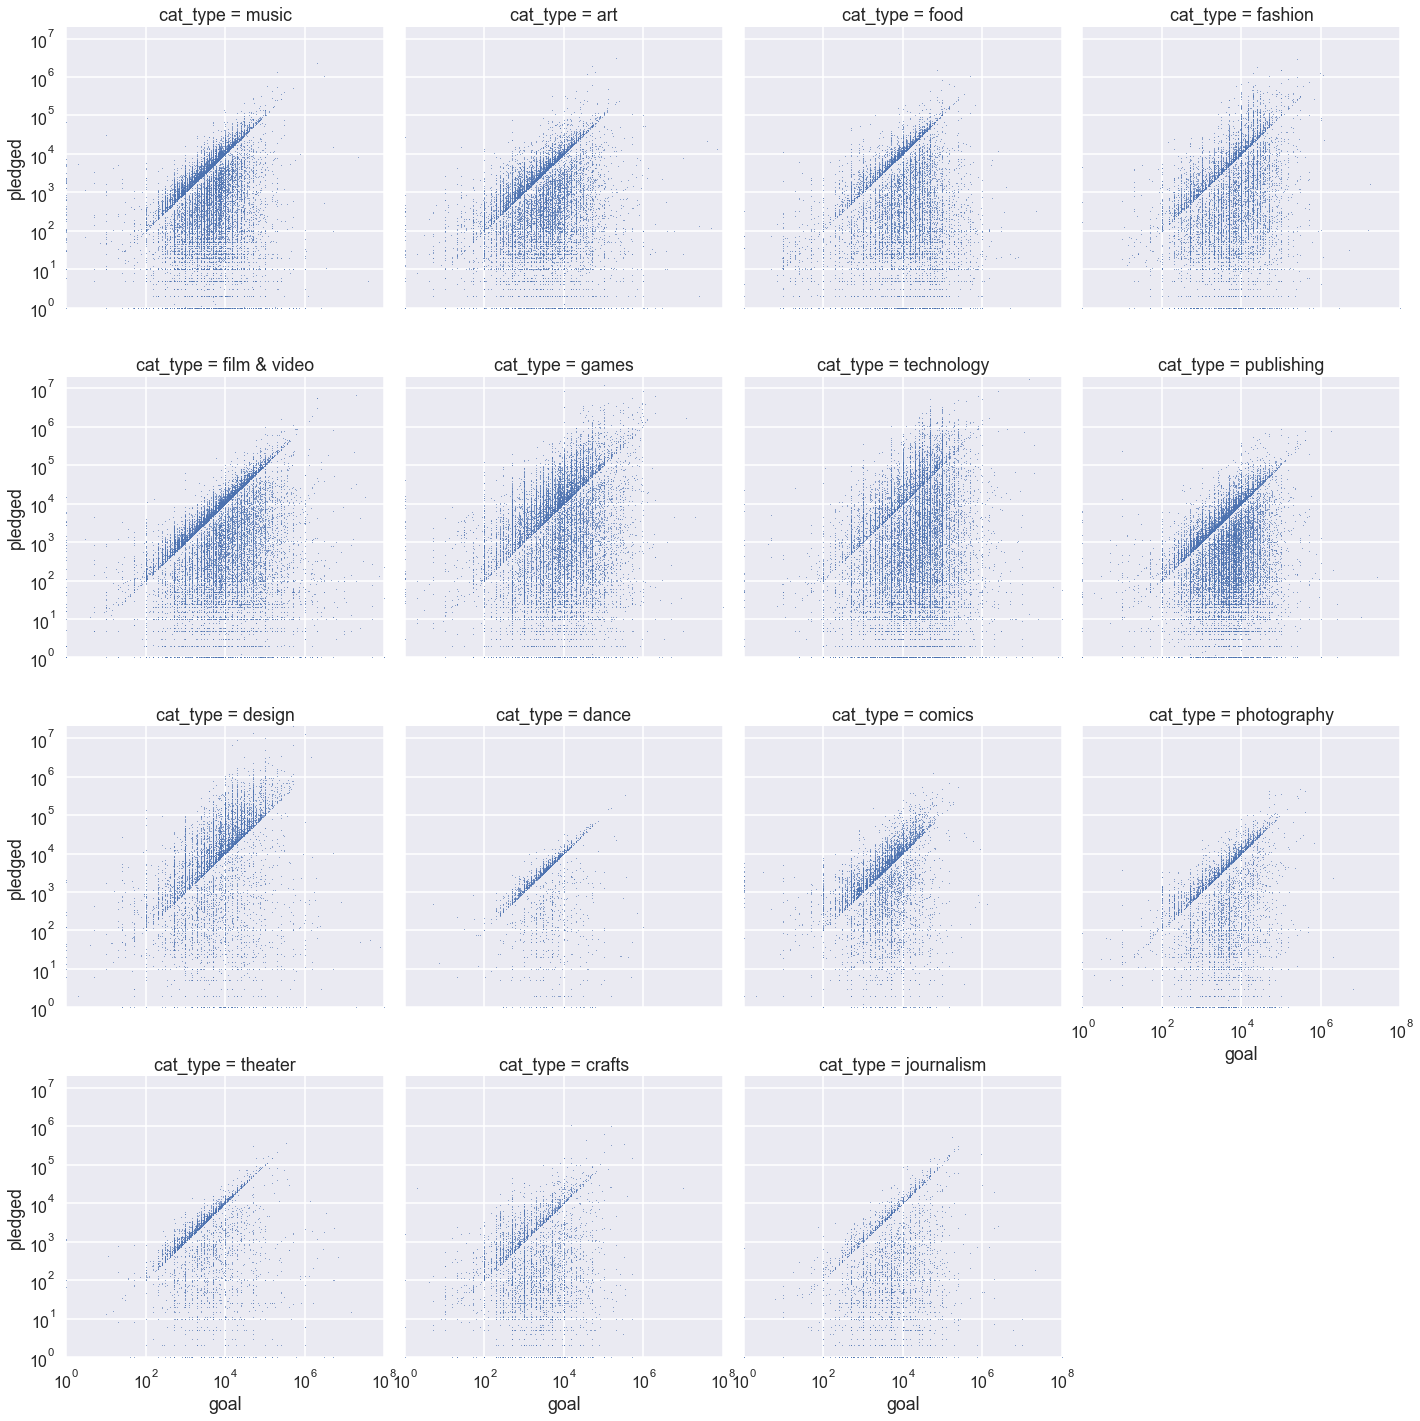

In [25]:
sns.set_context("poster")
print('Log-log plot of pledges vs. goals for different categories')
lmp = sns.lmplot(x="goal", y="pledged", col="cat_type", col_wrap=4, data=df, fit_reg=False, scatter_kws={"s": 1})
lmp.set(xscale="log", yscale="log")
plt.xlim(1,df.goal.max())
plt.ylim(1,df.usd_pledged.max())

The log-log plots of pledges vs. goals do reveal differences in the funding patterns in different categories. For instance, there is a high chance of pledges substantially exceeding the goal amount for the categories of design and games. This may be because the product can be easily replicated to satisfy larger number of funders/customers. In categories such as dance, theater, or film&video, the funding target is achieved with high probability, but the total pledged amounts to not exceed it by much. This may be given by either poor scalability of the project outputs or a limited pool of the funders/audience. 

These differences should be reflected in the future predictive model of pledged amounts.

## 4. Are staff picks predictive?

* The Kicksarter staff can review a project and judge its merits based on its content.
* How good are these recomendations as a predictor of the actual success?
* Even though the staff pick is useful as a predictor for funders, it may play a different role for proposers. Since a staff pick seems to help in funding, it may be worth exploring whether the proposal can be optimized to increase the chance of being picked. In this case the staff picks can be considered as a target for predictive modeling, and one of the features to be used for optimization of proposals. 

In [26]:
pt = df.pivot_table(index='staff_pick', columns='state', values='country', aggfunc='count')
print("Fraction of staff-picked projects:", df['staff_pick'].sum()/len(df))
print("Success rate of a random project:      ", pt.loc[:, 'successful'].sum()/(pt.loc[True,:].sum()+pt.loc[False,:].sum()))
print("Success rate of a staff-picked project:",pt.loc[True, 'successful']/pt.loc[True,:].sum())
print("Success rate of a non-picked project:  ",pt.loc[False, 'successful']/pt.loc[False,:].sum())

Fraction of staff-picked projects: 0.11634850874
Success rate of a random project:       0.4689083101284933
Success rate of a staff-picked project: 0.8473183391
Success rate of a non-picked project:   0.419083868028


** A: Staff pick almost doubles the chances of a project being succesful. **

**Q:**
* Can a model based on the statistical data beat the staff pick as a predictor?
* Can a combination of the data with the staff pick improve the predictions?

We have seen that Dance and Design categories have success rates aroud 75%. Can a combination of the category and staff pick improve the results? (If simply successful funding is the measure)

In [27]:
success = df.loc[(df.staff_pick == True) & (df.cat_type == 'dance') & (df.state == 'successful')]['goal'].count()/df.loc[(df.staff_pick == True) & (df.cat_type == 'dance')]['goal'].count()
print('Success rate for staff-picked dance projects:', success)

Success rate for staff-picked dance projects: 0.914691943128


In [28]:
success = df.loc[(df.staff_pick == True) & (df.cat_type == 'design') & (df.state == 'successful')]['goal'].count()/df.loc[(df.staff_pick == True) & (df.cat_type == 'design')]['goal'].count()
print('Success rate for staff-picked dance projects:', success)

Success rate for staff-picked dance projects: 0.952941176471


**A:** Simply combining the staff pick with the design category brings the success rate to 95%!

**Summary**

There is a lot of structure in the data, which can be further analyzed and quantified by statistical methods, which will allow for rigorous hypothesis testing, and the results can be used in the design of predictive models useful for both funders and enterpreneurs. These tasks will be addressed next.